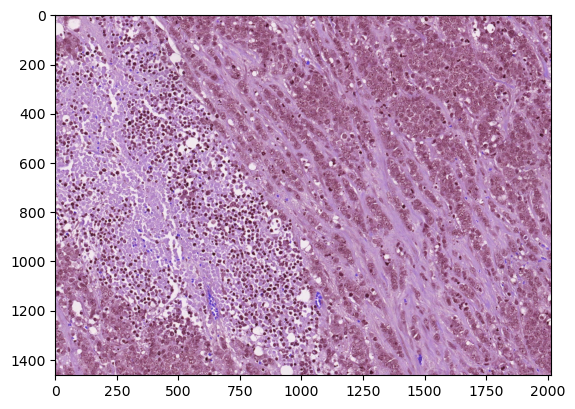

(1463, 2015, 3)
uint8
0 255


In [2]:
from PIL import Image
import rawpy
from scipy.signal import convolve2d
import imageio
import matplotlib.pyplot as plt
import numpy as np

#raw_processed = cv.imread("/Users/tianale/Users/tianale/Documents/DSAN6500/Project/wsirois/roi-level-annotations/tissue-bcss/images/TCGA-A1-A0SK-01Z-00-DX1.A44D70FA-4D96-43F4-9DD7-A61535786297_\[22877\,\ 12530\,\ 24892\,\ 13993\].png")

import cv2


image = cv2.imread('images/TCGA-A1-A0SK-01Z-00-DX1.A44D70FA-4D96-43F4-9DD7-A61535786297_[22877, 12530, 24892, 13993].png', cv2.IMREAD_UNCHANGED)

if image is None:
    print("Error: Unable to read the image.")
else:
    # Display the image
    plt.imshow(image)
    plt.show()

print(image.shape)
print(image.dtype)
print(image.min(), image.max())

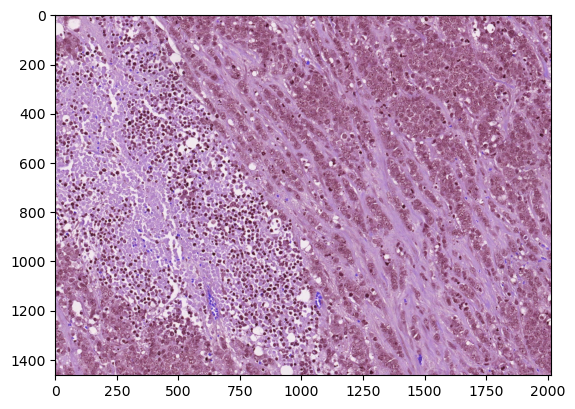

(2034, 2875, 3)
uint8
2 255


In [3]:
image2 = cv2.imread('images/TCGA-A1-A0SP-01Z-00-DX1.20D689C6-EFA5-4694-BE76-24475A89ACC0_[3401, 26862, 6276, 28896].png', cv2.IMREAD_UNCHANGED)

if image2 is None:
    print("Error: Unable to read the image.")
else:
    # Display the image
    plt.imshow(image)
    plt.show()

print(image2.shape)
print(image2.dtype)
print(image2.min(), image2.max())

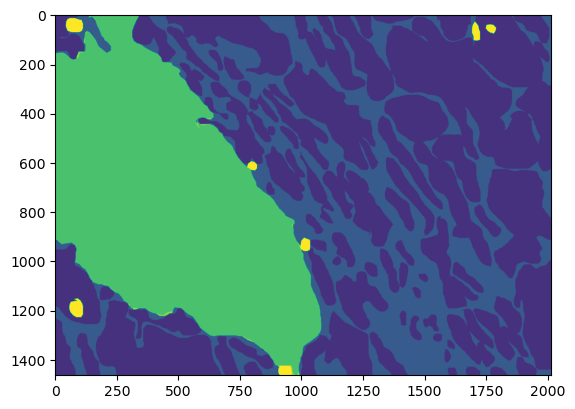

In [6]:
#copy is mask image
image = cv2.imread('images/TCGA-A1-A0SK-01Z-00-DX1.A44D70FA-4D96-43F4-9DD7-A61535786297_[22877, 12530, 24892, 13993] copy.png', cv2.IMREAD_UNCHANGED)


if image is None:
    print("Error: Unable to read the image.")
else:
    plt.imshow(image)
    plt.show()



In [7]:
import openslide
from openslide.deepzoom import DeepZoomGenerator

# Use openslide to open the whole-slide image
slide_path = 'images/100B.tif'
slide = openslide.OpenSlide(slide_path)

# Use DeepZoomGenerator object
dzg = DeepZoomGenerator(slide, tile_size=254, overlap=1, limit_bounds=False)

# Extract the Deep Zoom metadata
dzi_metadata = dzg.get_dzi('jpeg')
print("Deep Zoom Metadata:\n", dzi_metadata)

# Extract the number of Deep Zoom levels
level_count = dzg.level_count
print("Number of Deep Zoom levels:", level_count)

# Extract the total number of Deep Zoom tiles
tile_count = dzg.tile_count
print("Total number of Deep Zoom tiles:", tile_count)

# Find the dimensions of each Deep Zoom level
level_dimensions = dzg.level_dimensions
print("Dimensions of each Deep Zoom level:", level_dimensions)

# Example: Get and display a Deep Zoom tile from level 10
level = 10
address = (0, 0)  # Top-left tile
tile = dzg.get_tile(level, address)



Deep Zoom Metadata:
 <Image TileSize="254" Overlap="1" Format="jpeg" xmlns="http://schemas.microsoft.com/deepzoom/2008"><Size Width="67456" Height="37376" /></Image>
Number of Deep Zoom levels: 18
Total number of Deep Zoom tiles: 52582
Dimensions of each Deep Zoom level: ((1, 1), (2, 1), (3, 2), (5, 3), (9, 5), (17, 10), (33, 19), (66, 37), (132, 73), (264, 146), (527, 292), (1054, 584), (2108, 1168), (4216, 2336), (8432, 4672), (16864, 9344), (33728, 18688), (67456, 37376))


In [8]:
# save a copy of the tile
tile.save("images/tile_example.jpeg")